<a href="https://colab.research.google.com/github/Carvas91/Carlos_Vasconez_portfolio/blob/main/DL_Regression_Boston_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from tensorflow.keras.datasets import boston_housing

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [4]:
X_train.shape

(404, 13)

In [5]:
X_test.shape

(102, 13)

In [6]:
dir(boston_housing)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [7]:
features = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

In [8]:
df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
df_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [9]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [10]:
X_test.shape

(51, 13)

In [11]:
X_val.shape

(51, 13)

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [13]:
network = models.Sequential()

network.add(layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation="relu"))
network.add(layers.Dense(1))

In [14]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 741 (2.89 KB)
Trainable params: 741 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
network.layers

In [16]:
network.compile(optimizer="sgd",
                loss="mse")

In [17]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [18]:
history = network.fit(X_train_scaled,
                      y_train, epochs=30,
                      validation_data=(X_val_scaled, y_val))

Epoch 1/30
13/13 [==============================] - 4s 121ms/step - loss: 450.0311 - val_loss: 223.5213
Epoch 2/30
13/13 [==============================] - 0s 26ms/step - loss: 154.2146 - val_loss: 52.0370
Epoch 3/30
13/13 [==============================] - 0s 9ms/step - loss: 112.2832 - val_loss: 118.5668
Epoch 4/30
13/13 [==============================] - 0s 16ms/step - loss: 80.8058 - val_loss: 43.0937
Epoch 5/30
13/13 [==============================] - 0s 9ms/step - loss: 25.9653 - val_loss: 38.9001
Epoch 6/30
13/13 [==============================] - 0s 7ms/step - loss: 41.4755 - val_loss: 42.6239
Epoch 7/30
13/13 [==============================] - 0s 9ms/step - loss: 29.7261 - val_loss: 38.4807
Epoch 8/30
13/13 [==============================] - 0s 14ms/step - loss: 21.9549 - val_loss: 67.0435
Epoch 9/30
13/13 [==============================] - 0s 8ms/step - loss: 29.4389 - val_loss: 54.6643
Epoch 10/30
13/13 [==============================] - 0s 8ms/step - loss: 53.2210 - val_los

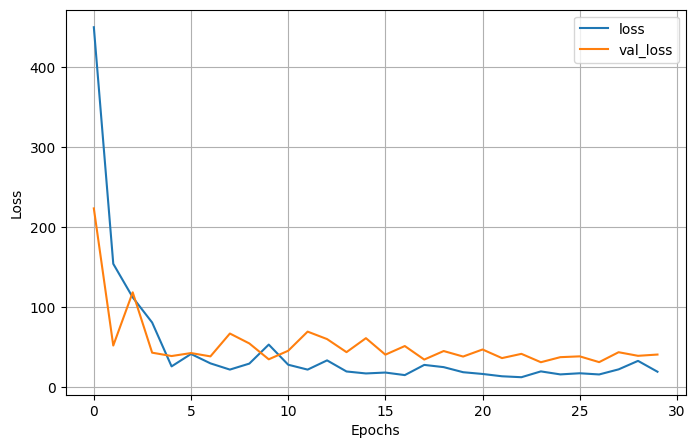

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [22]:
test_loss = network.evaluate(X_test_scaled, y_test)
print('test mse: ',  test_loss)

2/2 [==============================] - 0s 14ms/step - loss: 11.1887
test mse:  11.188708305358887


In [23]:
network.save("boston_housing.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
